In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

Extracting the data

In [206]:
data=pd.read_csv('/Users/michaelfilletti/Desktop/Uni/AI/Machine Learning/JP/201819_car_insurance_data - 201819.csv')
header=['Class', 'Kilometres', 'MarketValue', 'Year', 'Model']
data=pd.read_csv('/Users/michaelfilletti/Desktop/Uni/AI/Machine Learning/JP/201819_car_insurance_data - 201718.csv', header=None, names=header)

Based on 2018-19 data

Piecewise Model - Full dataset

In [207]:
#Creating the dataset
x=np.array(data.sort_values('Kilometres',ascending=False)['Kilometres'])
y=np.array(data.sort_values('Kilometres',ascending=False)['MarketValue'])
print(x)
print(x1h)
print(x2h)

[199312 178000 160000 142278 138000 118895 118000 110000  97000  85697
  84000  71010  62000  60000  57000  46863  45312  45000  42533  42000
  31286  14822]
[14822 31286 42533 45312 46863 57000 60000 71010 84000 85697]
[ 97000 118000 118895 142278 199312 138000 110000  45000  42000  62000]


In [208]:
#Creating the dataset
x=np.array(data.sort_values('Kilometres')['Kilometres'])
y=np.array(data.sort_values('Kilometres')['MarketValue'])
x1h=x[0:10]
y1h=y[0:10]

x=np.array(data.sort_values('Kilometres',ascending=False)['Kilometres'])
y=np.array(data.sort_values('Kilometres',ascending=False)['MarketValue'])
x2h=x[0:12]
y2h=y[0:12]

#Extracting the parameters for first half
n=len(x1h)
xy=x1h*y1h
x_sqrd=x1h*x1h

m1h=(n*np.sum(xy)-(np.sum(x1h)*np.sum(y1h)))/(n*np.sum(x_sqrd)-(np.sum(x1h))**2)
b1h=(np.sum(y1h)*np.sum(x_sqrd)-np.sum(xy)*np.sum(x1h))/(n*np.sum(x_sqrd)-(np.sum(x1h))**2)
print('First half of model')
print('b=',b1h,'m=',m1h,)

R_sqrd1h=1-(np.sum((y1h-(m1h*x1h+b1h))**2))/(np.sum((y1h-(np.mean(y1h)))**2))
print('Our R squared value is',R_sqrd1h,)

#Extracting the parameters for second half
n=len(x2h)
xy=x2h*y2h
x_sqrd=x2h*x2h

m2h=(n*np.sum(xy)-(np.sum(x2h)*np.sum(y2h)))/(n*np.sum(x_sqrd)-(np.sum(x2h))**2)
b2h=(np.sum(y2h)*np.sum(x_sqrd)-np.sum(xy)*np.sum(x2h))/(n*np.sum(x_sqrd)-(np.sum(x2h))**2)
print('')
print('Second half of model')
print('b=',b2h,'m=',m2h,)

R_sqrd2h=1-(np.sum((y2h-(m2h*x2h+b2h))**2))/(np.sum((y2h-(np.mean(y2h)))**2))
print('Our R squared value is',R_sqrd2h,)

xh=np.concatenate([x1h,x2h])
yh=np.concatenate([y1h,y2h])
y_fit=np.concatenate([(x1h*m1h+b1h),(x2h*m2h+b2h)])
R_sqrd=1-((np.sum((yh-(y_fit))**2))/(np.sum((yh-np.mean(yh))**2)))
print('')
print('Our R squared value of the entire model is',R_sqrd,)

First half of model
b= 19989.50441776251 m= -0.2463990639941835
Our R squared value is 0.6059863535823578

Second half of model
b= 6704.725466886015 m= -0.020740827805388516
Our R squared value is 0.13246668605158496

Our R squared value of the entire model is 0.6733342469686667


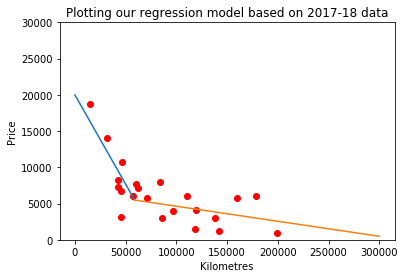

In [209]:
#Plotting the dataset
import matplotlib.pyplot as plt

xrange1h=range(0,int(round((b2h-b1h)/(m1h-m2h))))
xrange2h=range(int(round(((b2h-b1h)/(m1h-m2h)))),300000)
yrange1h=m1h*xrange1h+b1h
yrange2h=m2h*xrange2h+b2h
plt.xlabel('Kilometres')
plt.ylabel('Price')
plt.ylim(0,30000)
plt.title('Plotting our regression model based on 2017-18 data')
plt.plot(xrange1h, yrange1h)
plt.plot(xrange2h, yrange2h)
plt.scatter(x,y,color='r')
plt.show()

In [210]:
print(np.sum((yh-yh)**2))
print(np.sum((y-np.mean(y))**2))

0
363278636.3636364


Linear Model - Trimmed Data - Using Intuition

In [211]:
#Using Pearson's Residuals
#Creating the dataset
x_orig=np.array(data['Kilometres'])
y_orig=np.array(data['MarketValue'])

#Calculating Pearsons Residuals
PR=(y_orig-np.mean(y_orig))/np.sqrt(np.var(y_orig))

x=np.delete(x_orig,(14,21))
y=np.delete(y_orig,(14,21))

#Creating the dataset
x1ht=x[0:10]
y1ht=y[0:10]

x2ht=x[10:20]
y2ht=y[10:20]

#Extracting the parameters for first half
n=len(x1ht)
xy=x1ht*y1ht
x_sqrd=x1ht*x1ht

m1ht=(n*np.sum(xy)-(np.sum(x1ht)*np.sum(y1ht)))/(n*np.sum(x_sqrd)-(np.sum(x1ht))**2)
b1ht=(np.sum(y1h)*np.sum(x_sqrd)-np.sum(xy)*np.sum(x1ht))/(n*np.sum(x_sqrd)-(np.sum(x1ht))**2)
print('First half of model')
print('b=',b1ht,'m=',m1ht,)

R_sqrd1ht=1-(np.sum((y1ht-(m1ht*x1ht+b1ht))**2))/(np.sum((y1ht-(np.mean(y1ht)))**2))
print('Our R squared value is',R_sqrd1ht,)

#Extracting the parameters for second half
n=len(x2ht)
xy=x2ht*y2ht
x_sqrd=x2ht*x2ht

m2ht=(n*np.sum(xy)-(np.sum(x2ht)*np.sum(y2ht)))/(n*np.sum(x_sqrd)-(np.sum(x2ht))**2)
b2ht=(np.sum(y2ht)*np.sum(x_sqrd)-np.sum(xy)*np.sum(x2ht))/(n*np.sum(x_sqrd)-(np.sum(x2ht))**2)
print('')
print('Second half of model')
print('b=',b2ht,'m=',m2ht,)

R_sqrd2ht=1-(np.sum((y2ht-(m2ht*x2ht+b2ht))**2))/(np.sum((y2ht-(np.mean(y2ht)))**2))
print('Our R squared value is',R_sqrd2ht,)

xht=np.concatenate([x1ht,x2ht])
yht=np.concatenate([y1ht,y2ht])
y_fit=np.concatenate([(x1ht*m1ht+b1ht),(x2ht*m2ht+b2ht)])
R_sqrdt=1-((np.sum((yht-(y_fit))**2))/(np.sum((yht-np.mean(yht))**2)))
print('')
print('Our R squared value of the entire model is',R_sqrdt,)

First half of model
b= 19100.122445066052 m= -0.16660810656783048
Our R squared value is 0.5804368827925273

Second half of model
b= 7996.2795583762 m= -0.03791455878987771
Our R squared value is 0.5327586298384488

Our R squared value of the entire model is 0.7100369475281453


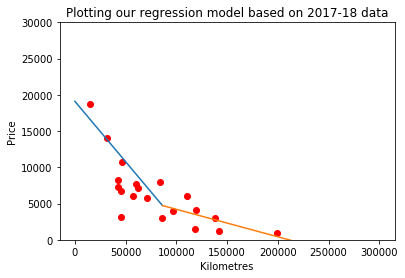

In [212]:
#Plotting the dataset
import matplotlib.pyplot as plt

xrange1ht=range(0,int(round((b2ht-b1ht)/(m1ht-m2ht))))
xrange2ht=range(int(round(((b2ht-b1ht)/(m1ht-m2ht)))),300000)
yrange1ht=m1ht*xrange1ht+b1ht
yrange2ht=m2ht*xrange2ht+b2ht
plt.xlabel('Kilometres')
plt.ylabel('Price')
plt.ylim(0,30000)
plt.title('Plotting our regression model based on 2017-18 data')
plt.plot(xrange1ht, yrange1ht)
plt.plot(xrange2ht, yrange2ht)
plt.scatter(x,y,color='r')
plt.show()

---

Testing our Models

In [213]:
data3=pd.read_csv('/Users/michaelfilletti/Desktop/Uni/AI/Machine Learning/JP/CarTestSet.csv')
x_test=np.array(data3['Kilometres'])
y_test=np.array(data3['MarketValue'])

Model 1 - Piecewise Regression - Full Dataset

0.6589547979258337


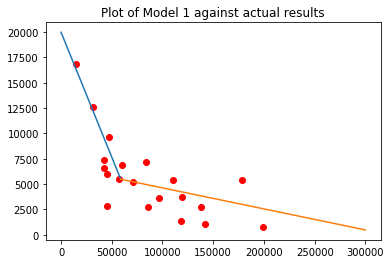

In [214]:
y_fit=[0]*len(x_test)
for i in range(0,len(x_test)):
    if (x_test[i]<(b2h-b1h)/(m1h-m2h)):
        y_fit[i]=m1h*x_test[i]+b1h
    else:
        y_fit[i]=m2h*x_test[i]+b2h

#Compare results of our fitted y values against the actual y values
R_sqrd=1-(np.sum((y_test-y_fit)**2))/(np.sum((y_test-(np.mean(y_test)))**2))
print(R_sqrd)

plt.title('Plot of Model 1 against actual results')
plt.scatter(x_test,y_test,color='r')
plt.plot(xrange1h, yrange1h)
plt.plot(xrange2h, yrange2h)
plt.show()

Model 2 - Piecewise Regression - Excluded Outliers Dataset

0.23260753554408597


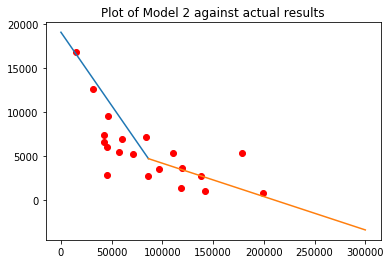

In [217]:
y_fit=[0]*len(x_test)
for i in range(0,len(x_test)):
    if (x_test[i]<(b2ht-b1ht)/(m1ht-m2ht)):
        y_fit[i]=m1ht*x_test[i]+b1ht
    else:
        y_fit[i]=m2ht*x_test[i]+b2ht

#Compare results of our fitted y values against the actual y values
R_sqrd=1-(np.sum((y_test-y_fit)**2))/(np.sum((y_test-(np.mean(y_test)))**2))
print(R_sqrd)

plt.title('Plot of Model 2 against actual results')
plt.scatter(x_test,y_test,color='r')
plt.plot(xrange1ht, yrange1ht)
plt.plot(xrange2ht, yrange2ht)
plt.show()